In [1]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yellowbrick
!pip install folium
import folium

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('crime.csv', encoding='latin-1')

In [3]:
train.head()


,Unnamed,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24,29,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20,42,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37,25,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,28,25,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28,25,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed               3970 non-null   int64  
 1   ID                    3970 non-null   int64  
 2   Case Number           3970 non-null   object 
 3   Date                  3970 non-null   object 
 4   Block                 3970 non-null   object 
 5   IUCR                  3970 non-null   object 
 6   Primary Type          3970 non-null   object 
 7   Description           3970 non-null   object 
 8   Location Description  3951 non-null   object 
 9   Arrest                3970 non-null   bool   
 10  Domestic              3970 non-null   bool   
 11  Beat                  3970 non-null   int64  
 12  District              3970 non-null   int64  
 13  Ward                  3970 non-null   int64  
 14  Community Area        3970 non-null   int64  
 15  FBI Code             

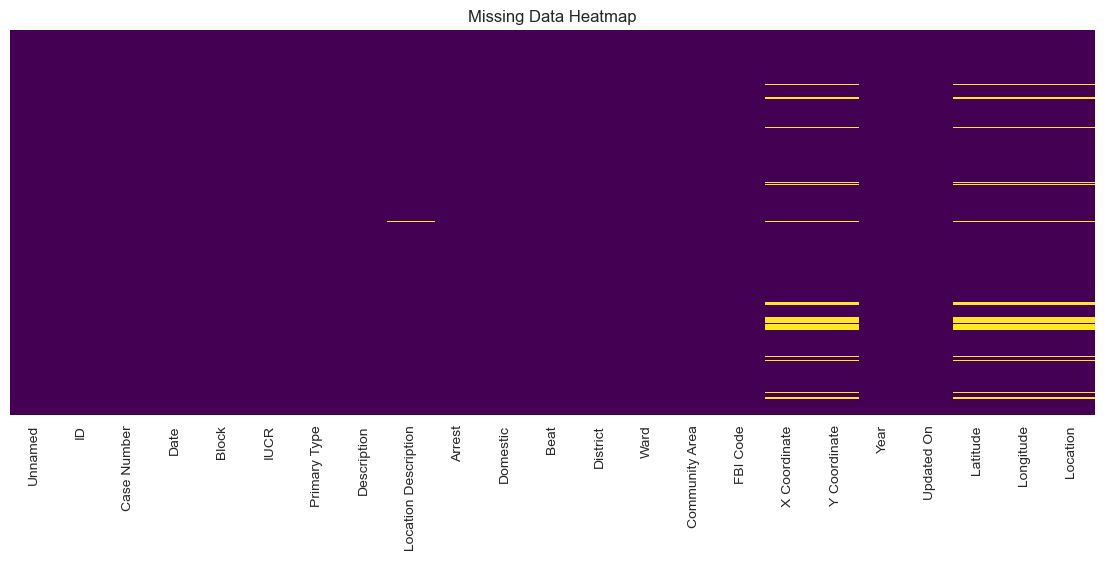

In [5]:
#Heatmap for missing data
plt.figure(figsize=(14, 5))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis',yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [6]:
train.isnull().sum()

Unnamed                   0
ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description     19
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate            296
Y Coordinate            296
Year                      0
Updated On                0
Latitude                296
Longitude               296
Location                296
dtype: int64

In [7]:
train=train.dropna()

In [8]:
train.isnull().sum()

Unnamed                 0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [9]:
train.duplicated().sum()

0

In [10]:
pd.value_counts(train['Location Description'])[:10]

Location Description
STREET                            863
RESIDENCE                         562
APARTMENT                         445
SIDEWALK                          371
OTHER                             137
PARKING LOT/GARAGE(NON.RESID.)    119
VEHICLE NON-COMMERCIAL            109
ALLEY                              97
SMALL RETAIL STORE                 92
RESIDENTIAL YARD (FRONT/BACK)      74
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Location Description'>

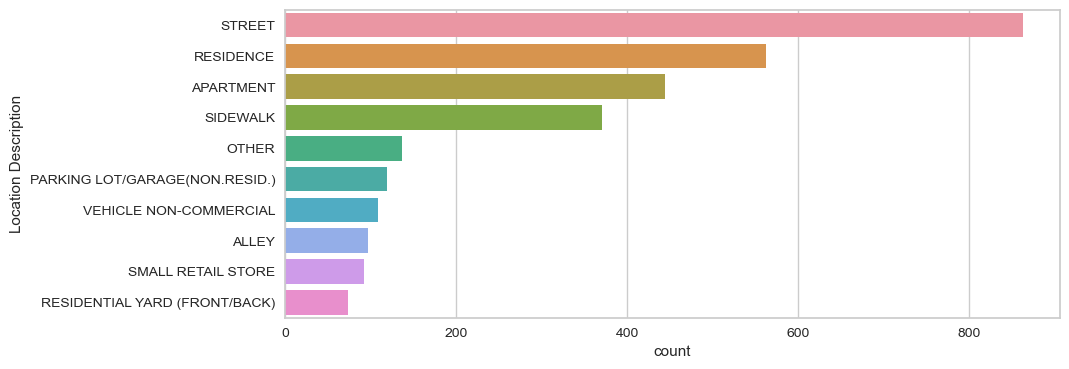

In [11]:
plt.figure(figsize = (10, 4))
sns.countplot(y= 'Location Description', data = train, order = train['Location Description'].value_counts().iloc[:10].index)

In [12]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
locations = train.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
1,41.998131,-87.665814,SIDEWALK,False
2,41.999731,-87.705810,STREET,False
3,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False
5,41.961482,-87.676856,MEDICAL/DENTAL OFFICE,False


In [13]:
popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""

In [14]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)


In [15]:
chicago_map

In [16]:
unique_locations = train['Location'].value_counts()
unique_locations.index

Index(['(41.868180939, -87.709271389)', '(41.976290414, -87.905227221)',
       '(41.754592961, -87.741528537)', '(41.979006297, -87.906463155)',
       '(41.897895128, -87.624096605)', '(41.877822179, -87.655181405)',
       '(41.880660786, -87.731186405)', '(41.883500187, -87.627876698)',
       '(41.85102174, -87.618954852)', '(41.75089655, -87.627813307)',
       ...
       '(41.777463402, -87.739818831)', '(41.878567628, -87.627688599)',
       '(41.689530066, -87.643506256)', '(41.90291689, -87.624066746)',
       '(41.779446471, -87.60164911)', '(41.884410376, -87.653664839)',
       '(41.763712816, -87.693005818)', '(41.8809356, -87.709158314)',
       '(41.763263853, -87.596998313)', '(41.769451222, -87.608925614)'],
      dtype='object', name='Location', length=3405)

In [17]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.868180939, -87.709271389)",10
1,"(41.976290414, -87.905227221)",9
2,"(41.754592961, -87.741528537)",8
3,"(41.979006297, -87.906463155)",6
4,"(41.897895128, -87.624096605)",5


In [18]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)


In [19]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [20]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

In [21]:
%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45

    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

CPU times: total: 266 ms
Wall time: 276 ms


In [22]:
chicago_map_crime

In [23]:
# Remove irrelevant/not meaningfull attributes
train = train.drop(['Unnamed'], axis=1)
train = train.drop(['ID'], axis=1)
train = train.drop(['Case Number'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3665 entries, 0 to 3969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3665 non-null   object 
 1   Block                 3665 non-null   object 
 2   IUCR                  3665 non-null   object 
 3   Primary Type          3665 non-null   object 
 4   Description           3665 non-null   object 
 5   Location Description  3665 non-null   object 
 6   Arrest                3665 non-null   bool   
 7   Domestic              3665 non-null   bool   
 8   Beat                  3665 non-null   int64  
 9   District              3665 non-null   int64  
 10  Ward                  3665 non-null   int64  
 11  Community Area        3665 non-null   int64  
 12  FBI Code              3665 non-null   object 
 13  X Coordinate          3665 non-null   float64
 14  Y Coordinate          3665 non-null   float64
 15  Year                  3665

In [24]:
#remove the attributes which has same data
train = train.drop(['Date'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3665 entries, 0 to 3969
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 3665 non-null   object 
 1   IUCR                  3665 non-null   object 
 2   Primary Type          3665 non-null   object 
 3   Description           3665 non-null   object 
 4   Location Description  3665 non-null   object 
 5   Arrest                3665 non-null   bool   
 6   Domestic              3665 non-null   bool   
 7   Beat                  3665 non-null   int64  
 8   District              3665 non-null   int64  
 9   Ward                  3665 non-null   int64  
 10  Community Area        3665 non-null   int64  
 11  FBI Code              3665 non-null   object 
 12  X Coordinate          3665 non-null   float64
 13  Y Coordinate          3665 non-null   float64
 14  Year                  3665 non-null   int64  
 15  Updated On            3665

In [25]:
train.Block.value_counts()

Block
001XX N STATE ST        11
033XX W FILLMORE ST     10
100XX W OHARE ST         9
0000X W TERMINAL ST      9
076XX S CICERO AVE       8
                        ..
047XX W WEST END AVE     1
015XX N CLYBOURN AVE     1
071XX N ASHLAND BLVD     1
056XX W JACKSON BLVD     1
063XX W HAFT ST          1
Name: count, Length: 2978, dtype: int64

In [26]:
train.IUCR.value_counts()

IUCR
486     330
820     288
1320    217
1310    204
460     201
       ... 
2011      1
5130      1
1754      1
552       1
2090      1
Name: count, Length: 168, dtype: int64

In [27]:
train["Description"].value_counts()

Description
SIMPLE                            347
DOMESTIC BATTERY SIMPLE           330
$500 AND UNDER                    288
TO VEHICLE                        230
TO PROPERTY                       204
                                 ... 
AGG SEX ASSLT OF CHILD FAM MBR      1
FALSE FIRE ALARM                    1
AGGRAVATED PO:KNIFE/CUT INSTR       1
ATTEMPT: STRONGARM-NO WEAPON        1
ALTER/FORGE PRESCRIPTION            1
Name: count, Length: 158, dtype: int64

In [28]:
train["Arrest"].value_counts()

Arrest
False    2639
True     1026
Name: count, dtype: int64

In [29]:
train["Domestic"].value_counts()

Domestic
False    3120
True      545
Name: count, dtype: int64

In [30]:
train["Beat"].value_counts()

Beat
1122    45
1834    35
1011    33
321     31
1115    30
        ..
2023     3
924      3
1813     3
1621     2
1125     2
Name: count, Length: 272, dtype: int64

In [31]:
train["FBI Code"].value_counts()

FBI Code
6      755
08B    551
18     450
14     437
26     307
08A    161
11     159
3      149
7      145
5      141
04B    122
04A     85
15      45
24      33
20      33
2       24
10      21
01A     13
17      11
16      11
22       5
9        4
19       2
13       1
Name: count, dtype: int64

In [32]:
train["Updated On"].value_counts()

Updated On
05/13/2016 03:51:16 PM    581
05/14/2016 03:53:39 PM    566
05-12-2016 15:50          538
05-11-2016 15:50          518
04/15/2016 09:20:50 AM    492
05-12-2016 15:48          271
05/15/2016 03:49:40 PM    267
04/15/2016 03:49:27 PM    152
05-10-2016 15:56          139
05/15/2016 03:47:49 PM     40
05/13/2016 03:49:34 PM     35
05-11-2016 15:48           28
05/14/2016 03:51:42 PM     13
04/21/2016 03:49:53 PM      9
05/23/2016 03:48:54 PM      5
04/23/2016 03:51:28 PM      2
04/15/2016 08:55:02 AM      1
05/21/2016 03:51:41 PM      1
05-04-2016 15:46            1
05-07-2016 15:45            1
11/16/2016 03:50:39 PM      1
05-10-2016 15:54            1
05/17/2016 03:46:43 PM      1
05/22/2016 03:51:51 PM      1
04/18/2016 03:51:05 PM      1
Name: count, dtype: int64

In [33]:
train["District"].value_counts()

District
11    318
8     243
7     230
25    221
6     206
4     190
10    186
1     184
18    183
3     174
9     166
12    165
19    158
5     156
15    143
14    139
16    131
2     126
17    104
24     93
22     93
20     56
Name: count, dtype: int64

In [34]:
train["Ward"].value_counts()

Ward
28    234
42    193
24    191
2     158
27    143
17    126
6     121
20    115
21    105
34    101
15    100
16     94
3      88
37     87
5      86
7      84
8      81
9      79
29     77
32     76
30     70
1      66
14     63
43     58
18     58
44     55
10     55
11     53
25     49
41     48
4      48
26     47
45     46
13     45
23     44
22     42
46     42
40     42
50     42
31     40
36     39
12     39
35     36
39     34
38     33
33     31
49     29
48     28
47     24
19     20
Name: count, dtype: int64

In [35]:
train["Community Area"].value_counts()

Community Area
25    214
8     148
29    146
28    124
67    123
     ... 
13      7
12      5
47      3
9       2
74      2
Name: count, Length: 77, dtype: int64

In [36]:
#as updated on attribute has many repeated values
#so the column is dropped
train = train.drop(['Updated On'], axis=1)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3665 entries, 0 to 3969
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 3665 non-null   object 
 1   IUCR                  3665 non-null   object 
 2   Primary Type          3665 non-null   object 
 3   Description           3665 non-null   object 
 4   Location Description  3665 non-null   object 
 5   Arrest                3665 non-null   bool   
 6   Domestic              3665 non-null   bool   
 7   Beat                  3665 non-null   int64  
 8   District              3665 non-null   int64  
 9   Ward                  3665 non-null   int64  
 10  Community Area        3665 non-null   int64  
 11  FBI Code              3665 non-null   object 
 12  X Coordinate          3665 non-null   float64
 13  Y Coordinate          3665 non-null   float64
 14  Year                  3665 non-null   int64  
 15  Latitude              3665

In [38]:
print(train.dtypes)

Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Latitude                float64
Longitude               float64
Location                 object
dtype: object


In [39]:
train.columns

Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [40]:
train.shape

(3665, 18)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3665 entries, 0 to 3969
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 3665 non-null   object 
 1   IUCR                  3665 non-null   object 
 2   Primary Type          3665 non-null   object 
 3   Description           3665 non-null   object 
 4   Location Description  3665 non-null   object 
 5   Arrest                3665 non-null   bool   
 6   Domestic              3665 non-null   bool   
 7   Beat                  3665 non-null   int64  
 8   District              3665 non-null   int64  
 9   Ward                  3665 non-null   int64  
 10  Community Area        3665 non-null   int64  
 11  FBI Code              3665 non-null   object 
 12  X Coordinate          3665 non-null   float64
 13  Y Coordinate          3665 non-null   float64
 14  Year                  3665 non-null   int64  
 15  Latitude              3665

In [42]:
train.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24,29,08B,1154907.0,1893681.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20,42,08B,1183066.0,1864330.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37,25,24,1140789.0,1904819.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28,25,08B,1143223.0,1901475.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28,25,6,1139890.0,1901675.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [43]:
# Convert Categorical Attributes to Numerical
train['Block'] = pd.factorize(train["Block"])[0]
train['IUCR'] = pd.factorize(train["IUCR"])[0]
train['Description'] = pd.factorize(train["Description"])[0]
train['Location Description'] = pd.factorize(train["Location Description"])[0]
train['Arrest'] = pd.factorize(train["Arrest"])[0]
train['Domestic'] = pd.factorize(train["Domestic"])[0]
train['Beat'] = pd.factorize(train["Beat"])[0]
train['District'] = pd.factorize(train["District"])[0]
train['FBI Code'] = pd.factorize(train["FBI Code"])[0]
train['Year'] = pd.factorize(train["Year"])[0]
train['Location'] = pd.factorize(train["Location"])[0]

In [44]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


In [45]:
print(train.groupby('Primary Type')['Primary Type'].count())

Primary Type
ARSON                                 4
ASSAULT                             245
BATTERY                             673
BURGLARY                            141
CRIM SEXUAL ASSAULT                  21
CRIMINAL DAMAGE                     437
CRIMINAL TRESPASS                    98
DECEPTIVE PRACTICE                  181
GAMBLING                              2
HOMICIDE                             13
INTERFERENCE WITH PUBLIC OFFICER     14
INTIMIDATION                          2
KIDNAPPING                            7
LIQUOR LAW VIOLATION                  5
MOTOR VEHICLE THEFT                 145
NARCOTICS                           450
OFFENSE INVOLVING CHILDREN           34
OTHER OFFENSE                       199
PROSTITUTION                         11
PUBLIC PEACE VIOLATION               22
ROBBERY                             149
SEX OFFENSE                          11
STALKING                              1
THEFT                               755
WEAPONS VIOLATION          

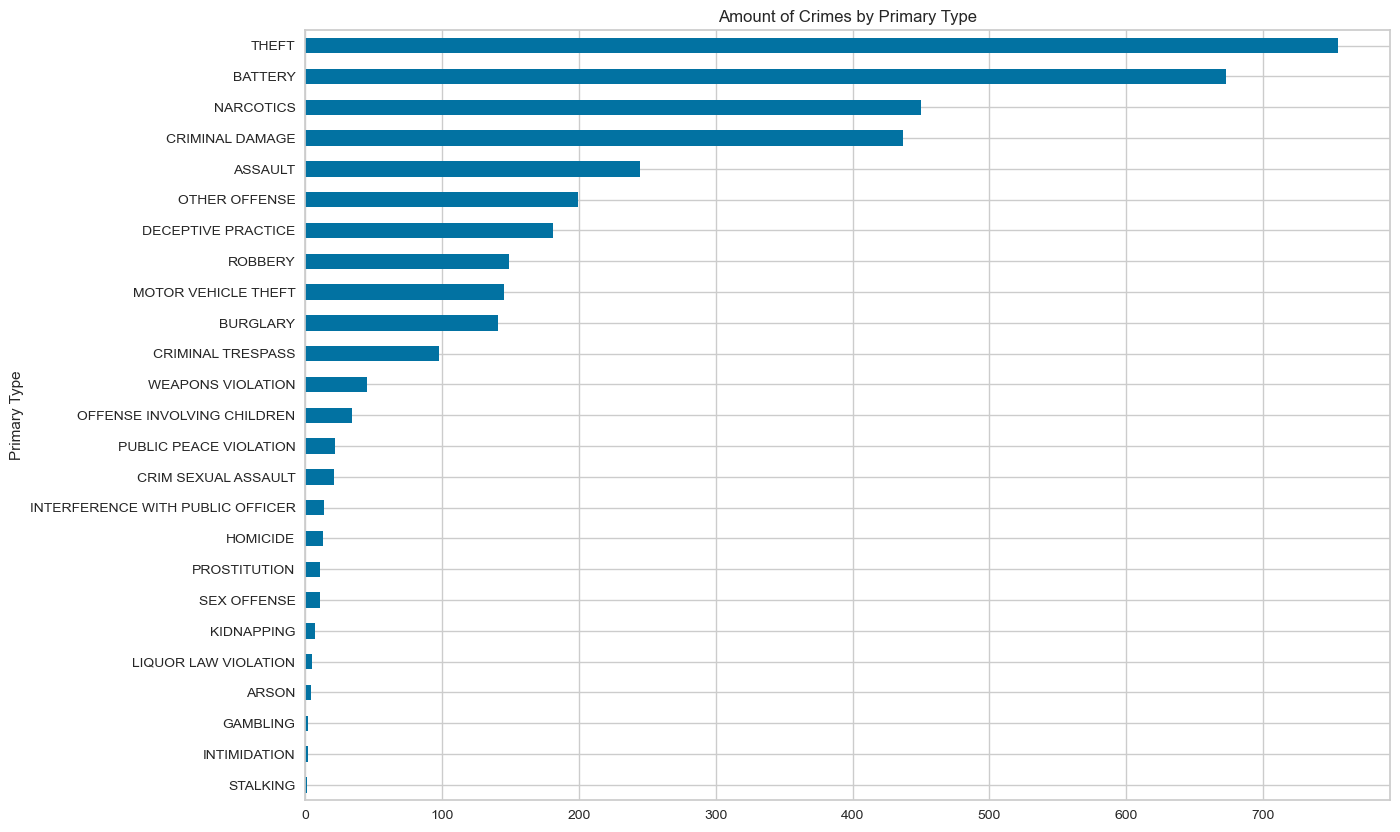

In [46]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

train.groupby([train['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [47]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = train.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
16,OFFENSE INVOLVING CHILDREN,34
19,PUBLIC PEACE VIOLATION,22
4,CRIM SEXUAL ASSAULT,21
10,INTERFERENCE WITH PUBLIC OFFICER,14
9,HOMICIDE,13
21,SEX OFFENSE,11
18,PROSTITUTION,11
12,KIDNAPPING,7
13,LIQUOR LAW VIOLATION,5
0,ARSON,4


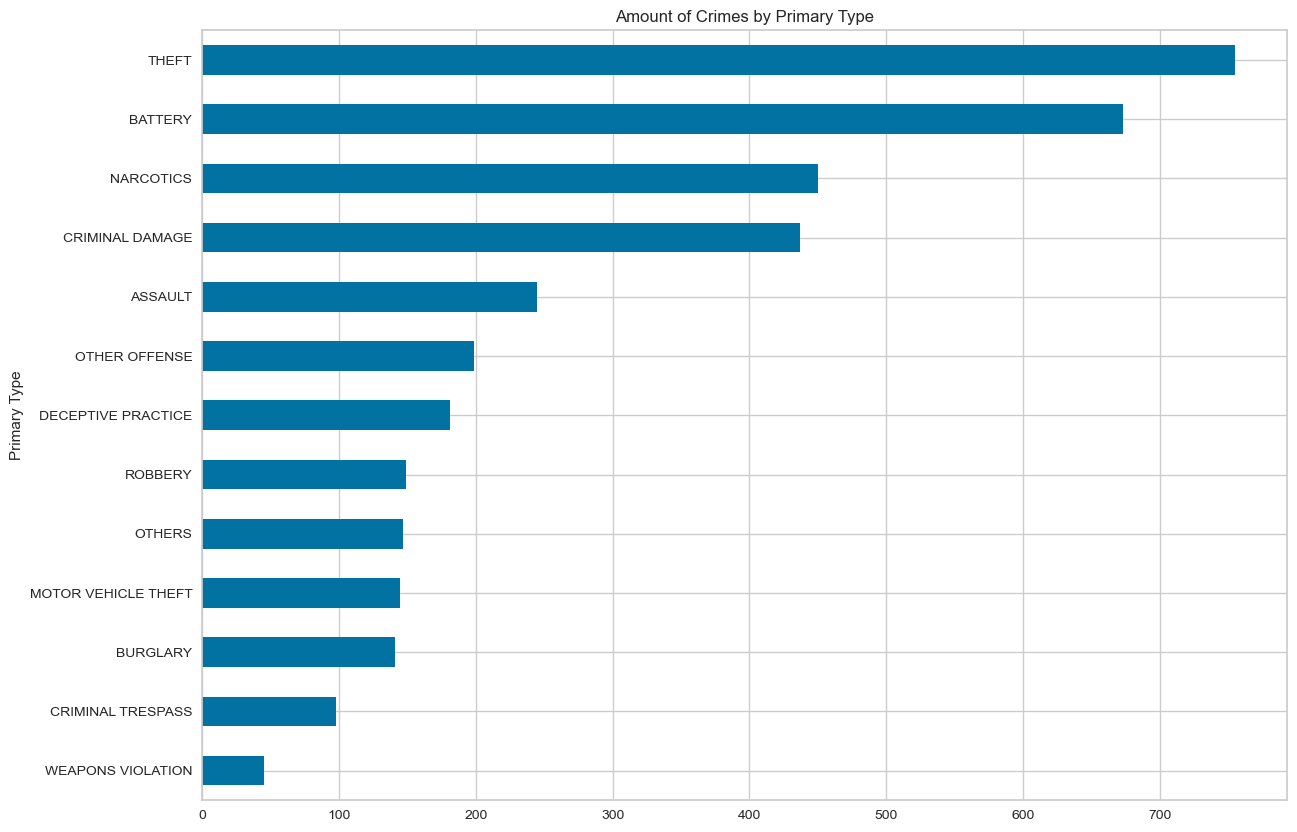

In [48]:
# After that, we replaced it with label 'OTHERS'
train.loc[train['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

train.groupby([train['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()


In [49]:
# Now we are left with 13 Class as our predictive class
Classes = train['Primary Type'].unique()
Classes

array(['BATTERY', 'OTHERS', 'THEFT', 'WEAPONS VIOLATION', 'ROBBERY',
       'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'NARCOTICS'], dtype=object)

In [50]:
#Encode target labels into categorical variables:
train['Primary Type'] = pd.factorize(train["Primary Type"])[0]
train['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

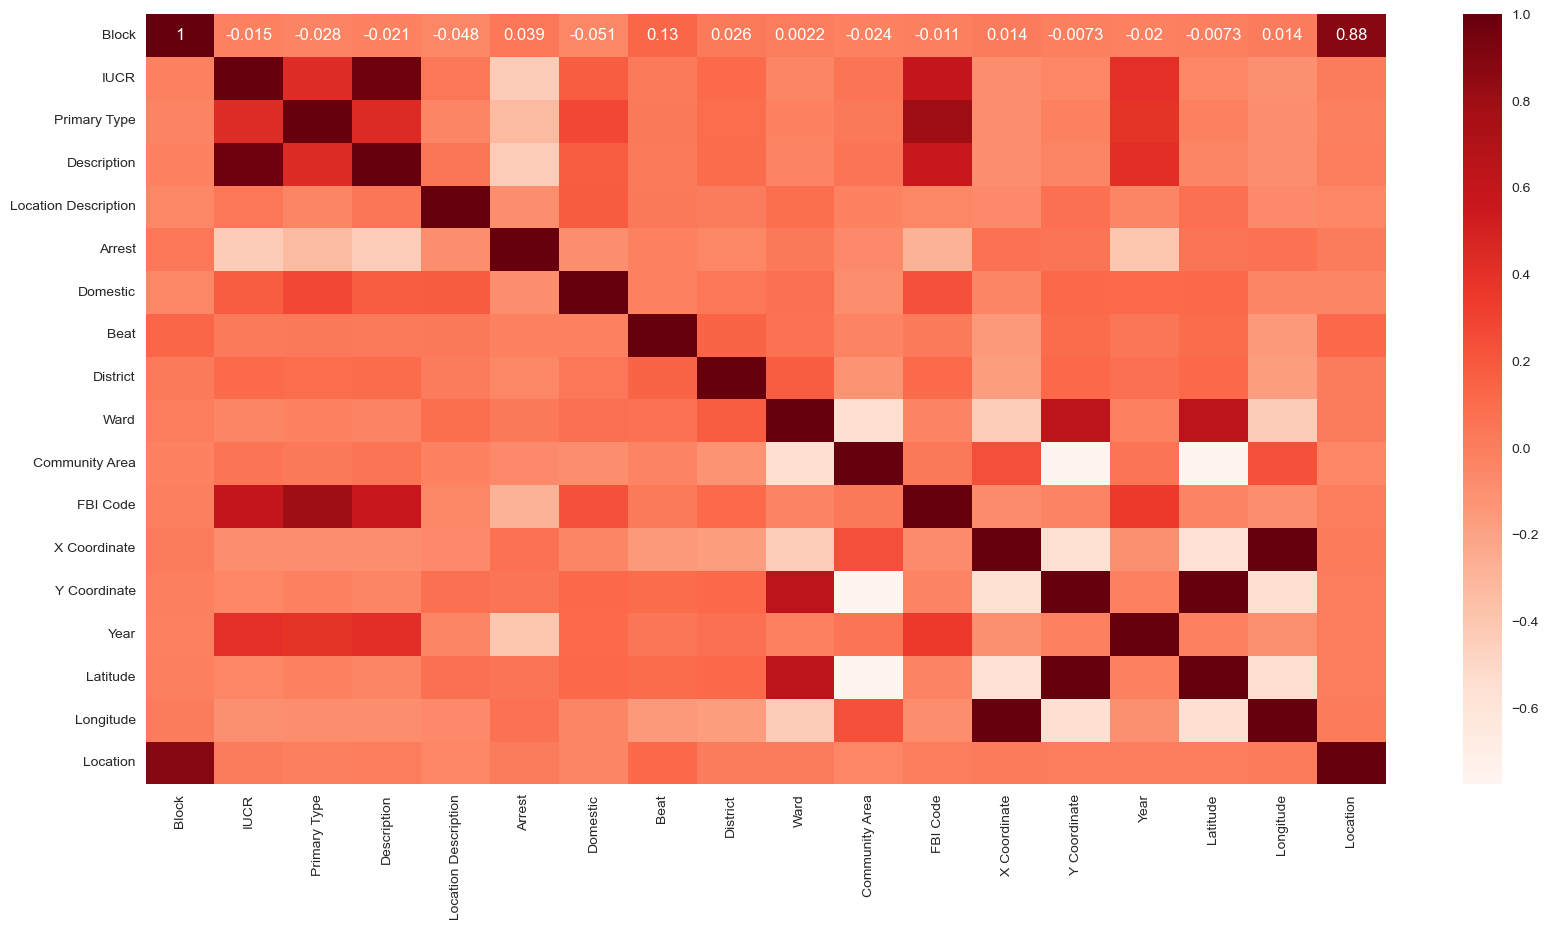

In [51]:
plt.figure(figsize=(20,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

Primary Type    1.0
Name: Primary Type, dtype: float64

In [53]:
#Correlation with output variable
cor_target = abs(cor['IUCR'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

IUCR           1.000000
Description    0.974216
Name: IUCR, dtype: float64

In [54]:
#Correlation with output variable
cor_target = abs(cor['X Coordinate'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

X Coordinate    1.000000
Longitude       0.999924
Name: X Coordinate, dtype: float64

In [55]:
#Correlation with output variable
cor_target = abs(cor['Y Coordinate'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

Y Coordinate    1.000000
Latitude        0.999994
Name: Y Coordinate, dtype: float64

In [56]:
#Correlation with output variable
cor_target = abs(cor['Y Coordinate'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

Y Coordinate    1.000000
Latitude        0.999994
Name: Y Coordinate, dtype: float64

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3665 entries, 0 to 3969
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 3665 non-null   int64  
 1   IUCR                  3665 non-null   int64  
 2   Primary Type          3665 non-null   int64  
 3   Description           3665 non-null   int64  
 4   Location Description  3665 non-null   int64  
 5   Arrest                3665 non-null   int64  
 6   Domestic              3665 non-null   int64  
 7   Beat                  3665 non-null   int64  
 8   District              3665 non-null   int64  
 9   Ward                  3665 non-null   int64  
 10  Community Area        3665 non-null   int64  
 11  FBI Code              3665 non-null   int64  
 12  X Coordinate          3665 non-null   float64
 13  Y Coordinate          3665 non-null   float64
 14  Year                  3665 non-null   int64  
 15  Latitude              3665

In [58]:
#here we have more columns on the location
#so we can drop some attributes
train = train.drop(['Block'], axis=1)
train = train.drop(['X Coordinate'], axis=1)
train = train.drop(['Y Coordinate'], axis=1)


In [59]:
#here we have more columns on the location
#so we can drop some attributes
train = train.drop(['Latitude'], axis=1)
train = train.drop(['Longitude'], axis=1)
train = train.drop(['Location'], axis=1)


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3665 entries, 0 to 3969
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   IUCR                  3665 non-null   int64
 1   Primary Type          3665 non-null   int64
 2   Description           3665 non-null   int64
 3   Location Description  3665 non-null   int64
 4   Arrest                3665 non-null   int64
 5   Domestic              3665 non-null   int64
 6   Beat                  3665 non-null   int64
 7   District              3665 non-null   int64
 8   Ward                  3665 non-null   int64
 9   Community Area        3665 non-null   int64
 10  FBI Code              3665 non-null   int64
 11  Year                  3665 non-null   int64
dtypes: int64(12)
memory usage: 372.2 KB


In [61]:
train.head()

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year
0,0,0,0,0,0,0,0,0,24,29,0,0
1,0,0,0,1,1,0,1,1,20,42,0,0
2,1,1,1,2,1,1,2,2,37,25,1,0
3,2,0,2,3,1,1,3,2,28,25,0,0
4,3,2,3,1,1,0,4,2,28,25,2,0


In [62]:
train = train.drop(['Description'], axis=1)
train = train.drop(['Community Area'], axis=1)
train = train.drop(['Ward'], axis=1)
train = train.drop(['Location Description'], axis=1)

In [63]:
train.head()

,IUCR,Primary Type,Arrest,Domestic,Beat,District,FBI Code,Year
0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,0
2,1,1,1,1,2,2,1,0
3,2,0,1,1,3,2,0,0
4,3,2,1,0,4,2,2,0


In [64]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
#Encoding data
labelDict = {}
for feature in train:
    le = preprocessing.LabelEncoder()
    le.fit(train[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train[feature] = le.transform(train[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)



label_IUCR [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]
label_Primary Type [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
label_Arrest [0, 1]
label_Domestic [0, 1]
label_Beat [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 

In [65]:
# Feature Selection using Filter Method
# Split Dataframe to target class and features
X_fs = train.drop(['Primary Type'], axis=1)
Y_fs = train['Primary Type']

In [66]:
# At Current Point, the attributes is select manually based on Feature Selection Part.
Features = ["IUCR","Arrest","Domestic","Beat","District","Year","FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Arrest', 'Domestic', 'Beat', 'District', 'Year', 'FBI Code']


In [67]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(train,
                        test_size = 0.2,
                        train_size = 0.8,
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test


print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Arrest', 'Domestic', 'Beat', 'District', 'Year', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (2932, 8)
Test Set Size       :  (733, 8)


In [68]:
x1

,IUCR,Arrest,Domestic,Beat,District,Year,FBI Code
1766,10,1,0,132,1,0,7
1703,133,0,1,29,16,0,4
3401,2,1,1,151,2,0,0
3725,3,1,1,66,3,0,2
2308,2,1,1,220,13,0,0
...,...,...,...,...,...,...,...
3247,0,1,0,265,9,0,0
1735,3,1,1,79,12,0,2
3589,5,0,1,114,19,0,4
1756,2,0,1,65,3,0,0


In [69]:
x2

1766    6
1703    3
3401    0
3725    2
2308    0
       ..
3247    0
1735    2
3589    3
1756    0
1996    0
Name: Primary Type, Length: 2932, dtype: int64

In [70]:
feature_names = train.columns  # Replace df with your dataset
print("Input Features:", feature_names)


Input Features: Index(['IUCR', 'Primary Type', 'Arrest', 'Domestic', 'Beat', 'District',
       'FBI Code', 'Year'],
      dtype='object')


In [71]:
# Decision Tree
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
# Create Model with configuration
dt_model = DecisionTreeClassifier(max_depth=50, min_samples_split=30, min_samples_leaf=25)
# Model Training
dt_model.fit(X=x1, y=x2)

# Prediction
result = dt_model.predict(y[Features])


In [72]:

# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Decision Tree Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)


========== Decision Tree Results ==========
Accuracy    :  0.9604365620736699
Recall      :  0.9604365620736699
Precision   :  0.9597208497660757
F1 Score    :  0.9604365620736699
Confusion Matrix: 
[[146   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  23   9   0   0   0   0   0   0   0   2   0   0]
 [  0   0 154   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  26   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0  55   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  42   0   0   2   0   0]
 [  0   1   0   0   0   0   4   0  26   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  76   0   0   0]
 [  0   0   0   0   0   0   0   7   0   0  11   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0  33   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  77]]


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, x1, x2, cv=kfold, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Cross-Validation Accuracy: 1.00 (+/- 0.00)


================= Classification Report =================

                     precision    recall  f1-score   support

            BATTERY       1.00      1.00      1.00       146
             OTHERS       0.82      0.68      0.74        34
              THEFT       0.94      1.00      0.97       154
  WEAPONS VIOLATION       1.00      1.00      1.00         4
            ROBBERY       1.00      1.00      1.00        31
MOTOR VEHICLE THEFT       1.00      1.00      1.00        26
            ASSAULT       0.93      0.96      0.95        57
      OTHER OFFENSE       0.86      0.95      0.90        44
 DECEPTIVE PRACTICE       1.00      0.84      0.91        31
    CRIMINAL DAMAGE       1.00      1.00      1.00        76
  CRIMINAL TRESPASS       0.73      0.61      0.67        18
           BURGLARY       1.00      0.94      0.97        35
          NARCOTICS       1.00      1.00      1.00        77

           accuracy                           0.96       733
          macro avg     

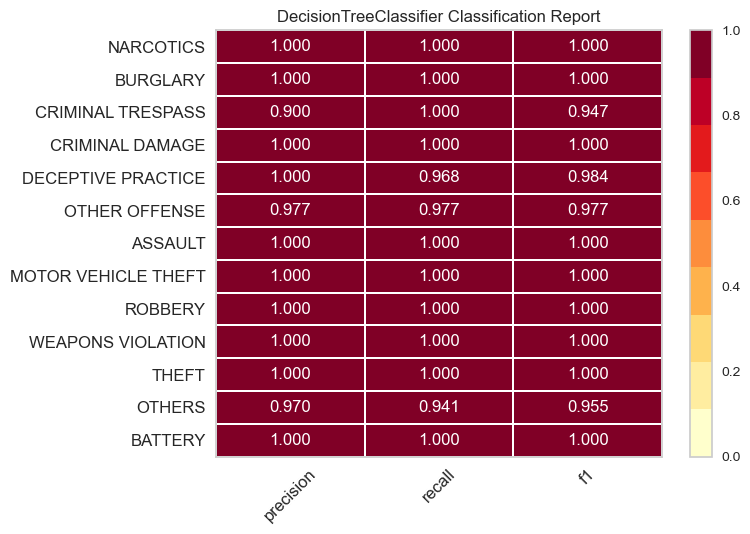

In [74]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(dt_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the dat

In [75]:
# Neural Network
import warnings
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

# Create Model with configuration
nn_model = MLPClassifier(solver='adam',
                         alpha=1e-5,
                         hidden_layer_sizes=(40,),
                         random_state=1,
                         max_iter=1000
                        )


# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features])

In [76]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.8281036834924966
Recall      :  0.8281036834924966
Precision   :  0.8200049408158518
F1 Score    :  0.8281036834924966
Confusion Matrix: 
[[141   0   3   0   0   2   0   0   0   0   0   0   0]
 [  8   8   1   0   1   0   3   1   1   1   0   3   7]
 [  4   0 150   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   1   0   1   0   0   0   0   0   0   0]
 [  1   1   0   0  27   2   0   0   0   0   0   0   0]
 [  1   1   0   0   1  19   3   0   0   1   0   0   0]
 [  0   4   0   0   2   3  34   0   3   5   3   0   3]
 [  0   3   0   0   0   0   2  15  13   3   7   0   1]
 [  0   3   0   0   0   0   5   0  18   2   1   0   2]
 [  0   0   0   0   0   0   0   0   2  73   0   0   1]
 [  0   1   0   0   3   0   0   4   0   0  10   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0  34   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  77]]


In [77]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(nn_model, x1,  x2, cv=kfold, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.83 (+/- 0.09)


================= Classification Report =================

                     precision    recall  f1-score   support

            BATTERY       0.90      0.97      0.93       146
             OTHERS       0.38      0.24      0.29        34
              THEFT       0.97      0.97      0.97       154
  WEAPONS VIOLATION       1.00      0.25      0.40         4
            ROBBERY       0.79      0.87      0.83        31
MOTOR VEHICLE THEFT       0.70      0.73      0.72        26
            ASSAULT       0.72      0.60      0.65        57
      OTHER OFFENSE       0.75      0.34      0.47        44
 DECEPTIVE PRACTICE       0.47      0.58      0.52        31
    CRIMINAL DAMAGE       0.86      0.96      0.91        76
  CRIMINAL TRESPASS       0.48      0.56      0.51        18
           BURGLARY       0.92      0.97      0.94        35
          NARCOTICS       0.85      1.00      0.92        77

           accuracy                           0.83       733
          macro avg     

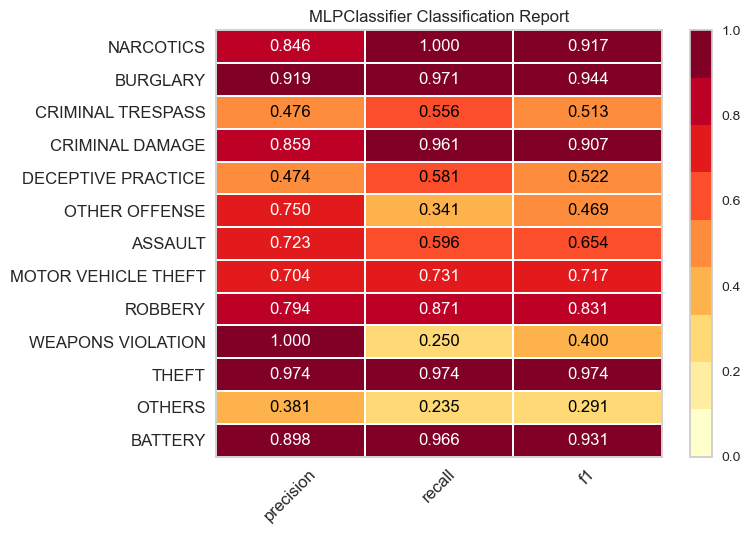

In [78]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

In [79]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True,
                                  max_depth = 50,
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [80]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Random Forest =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Random Forest =============
Accuracy    :  0.8908594815825375
Recall      :  0.8908594815825375
Precision   :  0.8921669695685959
F1 Score    :  0.8908594815825375
Confusion Matrix: 
[[141   0   5   0   0   0   0   0   0   0   0   0   0]
 [  3  11   6   0   0   0   4   1   1   0   0   0   8]
 [  0   0 154   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0   0   0   0   0   0]
 [  0   0   0   0  25   1   0   3   0   0   2   0   0]
 [  0   0   0   0   2  20   1   3   0   0   0   0   0]
 [  0   4   0   0   0   0  43   4   0   0   1   0   5]
 [  0   0   0   0   0   0   0  37   1   0   6   0   0]
 [  0   3   0   0   0   0   1   1  24   0   0   0   2]
 [  0   0   0   0   0   0   0   1   0  75   0   0   0]
 [  0   0   0   0   0   0   0   5   0   0  12   0   1]
 [  0   0   0   0   0   0   0   0   0   0   1  33   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  77]]


In [81]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, x1,  x2, cv=kfold, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.89 (+/- 0.02)


================= Classification Report =================

                     precision    recall  f1-score   support

            BATTERY       0.98      0.97      0.97       146
             OTHERS       0.61      0.32      0.42        34
              THEFT       0.93      1.00      0.97       154
  WEAPONS VIOLATION       1.00      0.25      0.40         4
            ROBBERY       0.86      0.81      0.83        31
MOTOR VEHICLE THEFT       0.91      0.77      0.83        26
            ASSAULT       0.88      0.75      0.81        57
      OTHER OFFENSE       0.67      0.84      0.75        44
 DECEPTIVE PRACTICE       0.92      0.77      0.84        31
    CRIMINAL DAMAGE       1.00      0.99      0.99        76
  CRIMINAL TRESPASS       0.55      0.67      0.60        18
           BURGLARY       1.00      0.94      0.97        35
          NARCOTICS       0.82      1.00      0.90        77

           accuracy                           0.89       733
          macro avg     

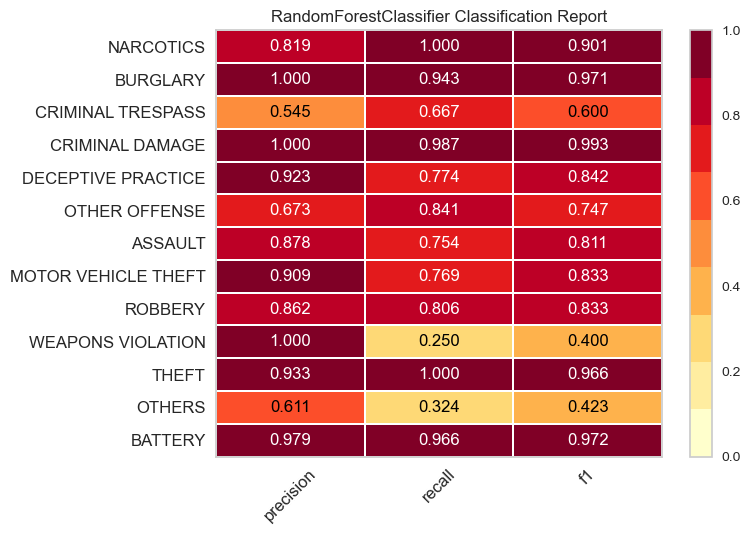

In [82]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the dat

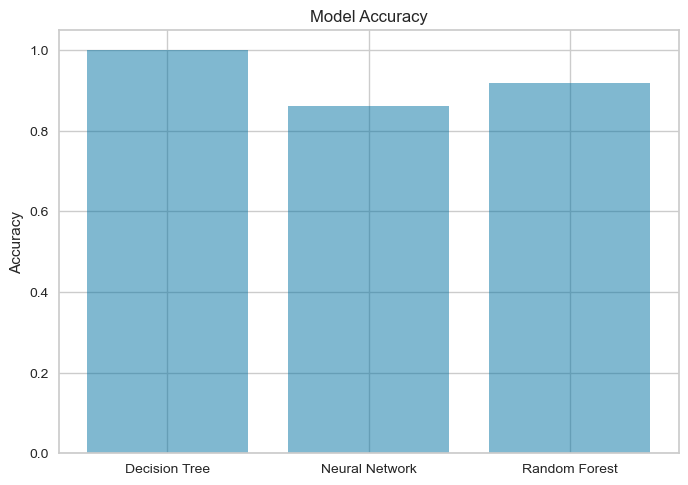

In [83]:
import matplotlib.pyplot as plt
import numpy as np

objects = ('Decision Tree', 'Neural Network', 'Random Forest')
accuracy_values = []

# Assuming dt_model, nn_model, knn_model, and rf_model are classifier objects
# You need to evaluate their performance and obtain accuracy scores
# Replace this with the actual code to evaluate model performance
accuracy_values.append(dt_model.score(x1,x2))  # Replace X_test, y_test with your test data
accuracy_values.append(nn_model.score(x1,x2))  # Replace X_test, y_test with your test data
accuracy_values.append(rf_model.score(x1,x2))  # Replace X_test, y_test with your test data

plt.bar(objects, accuracy_values, align='center', alpha=0.5)
plt.xticks(objects)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [84]:
import pickle
filename='model.pkl'
pickle.dump(dt_model ,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))